In [1]:
# import random  # numpy has its own built in random module
import numpy as np 
import timeit
import pandas as pd
import matplotlib.pyplot as plt
from citipy import citipy
import requests
import json

In [2]:
#%timeit np.random.uniform(-90.000, 90.000, size=1500)

In [3]:
def latitudes(size):
    latitudes = []
    x=0
    while x < (size):
        random_lat = np.random.randint(-90,90) + np.random.random()
        latitudes.append(random_lat)
        x+=1
        
    return latitudes 

%timeit latitudes(1500)        

4.39 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [4]:
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [5]:
coordinates = list(lat_lngs)

In [6]:
# for coordinate in coordinates:
#     print(coordinate[0], coordinates[1])

In [7]:
# for coordinate in coordinates:
#     print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
#           citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

In [8]:
cities = []

for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    if city not in cities:
        cities.append(city)
    
len(cities)

652

In [9]:
from config import weather_api_key

In [10]:
url = f"https://api.openweathermap.org/data/2.5/weather"

In [11]:
#print(url)

In [12]:
#city_url = url + "?q=" + "Boston"  + "&appid=" + weather_api_key

In [13]:
# weather_now = requests.get(city_url)
# Boston_data = weather_now.json()

In [14]:
# Make a 'Get' request for the city weather.
# city_weather = requests.get(city_url)
# city_weather

In [15]:
# # library of commands
# lat = Boston_data["coord"]["lat"]
# lng = Boston_data["coord"]["lon"]
# max_temp = Boston_data["main"]["temp_max"]
# humidity = Boston_data["main"]["humidity"]
# clouds = Boston_data["clouds"]["all"]
# wind = Boston_data["wind"]["speed"]
# max_temp

In [16]:
# from datetime import datetime
# date = Boston_data["dt"]
# datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

In [17]:
import time
from datetime import datetime

In [18]:
city_data = []
print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count= 1 
set_count =1 

Beginning Data Retrieval     
-----------------------------


In [19]:
# for i in range(len(cities)):    #for testing purposes

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         print(i)
#         set_count += 1
#         record_count = 1
#         time.sleep(60)
        
#     # Create endpoint URL with each city.
#     city_url = url + "?q=" + city.replace(" ","+") + "&appid=" + weather_api_key

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1

#     # Create endpoint URL with each city.
#     city_url = url + "?q=" + cities[i] + "&appid=" + weather_api_key
#     print(city_url)

In [20]:
city_data = []

In [21]:
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city.
    city_url = url + "?q=" + city.replace(" ","+") + "&appid=" + weather_api_key

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {cities[i]}")
    # Add 1 to the record count.
    record_count += 1

    # Create endpoint URL with each city.
    city_url = url + "?q=" + cities[i] + "&appid=" + weather_api_key
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": cities[i].title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass
    if i >=49:
        break
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kodinar
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | aksarka
Processing Record 5 of Set 1 | grand gaube
Processing Record 6 of Set 1 | vostok
Processing Record 7 of Set 1 | neiafu
Processing Record 8 of Set 1 | batemans bay
Processing Record 9 of Set 1 | susaki
Processing Record 10 of Set 1 | tasiilaq
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | mpika
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | severo-kurilsk
Processing Record 16 of Set 1 | baykit
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | komsomolskiy
Processing Record 20 of Set 1 | praia da vitoria
Processing Record 21 of Set 1 | dingle
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 24 of Se

In [22]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

In [23]:
new_column_order =  ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed' ]
city_data_df_wrong = city_data_df[new_column_order]
city_data_df_wrong

City Country                 Date      Lat       Lng  \
0            Kodinar      IN  2022-10-18 21:10:07  20.7903   70.7031   
1            Ushuaia      AR  2022-10-18 21:10:08 -54.8000  -68.3000   
2        Yellowknife      CA  2022-10-18 21:10:09  62.4560 -114.3525   
3            Aksarka      RU  2022-10-18 21:10:10  66.5606   67.7975   
4        Grand Gaube      MU  2022-10-18 21:10:11 -20.0064   57.6608   
5             Vostok      RU  2022-10-18 21:10:12  46.4856  135.8833   
6             Neiafu      TO  2022-10-18 21:10:13 -18.6500 -173.9833   
7       Batemans Bay      AU  2022-10-18 21:10:17 -35.7167  150.1833   
8             Susaki      JP  2022-10-18 21:10:17  33.3667  133.2833   
9           Tasiilaq      GL  2022-10-18 21:06:41  65.6145  -37.6368   
10          Khatanga      RU  2022-10-18 21:10:19  71.9667  102.5000   
11              Nome      US  2022-10-18 21:10:19  64.5011 -165.4064   
12             Mpika      ZM  2022-10-18 21:10:20 -11.8343   31.4529   
13            Faanui      PF  2022-10-18 21:10:21 -16.4833 -151.7500   
14    Severo-Kurilsk      RU  2022-10-18 21:10:22  50.6789  156.1250   
15            Baykit      RU  2022-10-18 21:10:23  61.6700   96.3700   
16   Arraial Do Cabo      BR  2022-10-18 21:10:23 -22.9661  -42.0278   
17         Busselton      AU  2022-10-18 21:10:24 -33.6500  115.3333   
18      Komsomolskiy      UZ  2022-10-18 21:10:25  40.4272   71.7189   
19  Praia Da Vitoria      PT  2022-10-18 21:10:26  38.7333  -27.0667   
20            Dingle      PH  2022-10-18 21:10:27  10.9995  122.6711   
21             Bluff      NZ  2022-10-18 21:10:28 -46.6000  168.3333   
22       East London      ZA  2022-10-18 21:10:29 -33.0153   27.9116   
23            Hobart      AU  2022-10-18 21:10:00 -42.8794  147.3294   
24      Nuevo Laredo      MX  2022-10-18 21:10:30  27.4763  -99.5164   
25           Bintulu      MY  2022-10-18 21:10:31   3.1667  113.0333   
26        Zvishavane      ZW  2022-10-18 21:10:32 -20.3267   30.0665   
27            Cairns      AU  2022-10-18 21:09:11 -16.9167  145.7667   
28          Etchojoa      MX  2022-10-18 21:10:33  26.9167 -109.6333   
29             Airai      TL  2022-10-18 21:10:34  -8.9266  125.4092   
30        Nikolskoye      RU  2022-10-18 21:10:35  59.7035   30.7861   
31         Nantucket      US  2022-10-18 21:10:36  41.2835  -70.0995   
32        Hambantota      LK  2022-10-18 21:10:37   6.1241   81.1185   
33           Rikitea      PF  2022-10-18 21:10:37 -23.1203 -134.9692   
34            Touros      BR  2022-10-18 21:09:39  -5.1989  -35.4608   
35              Hami      CN  2022-10-18 21:10:39  42.8000   93.4500   
36       Port Alfred      ZA  2022-10-18 21:10:40 -33.5906   26.8910   
37         Saskylakh      RU  2022-10-18 21:10:40  71.9167  114.0833   
38            Barrow      US  2022-10-18 21:10:41  71.2906 -156.7887   
39             Vaini      TO  2022-10-18 21:10:42 -21.2000 -175.2000   
40           Mataura      NZ  2022-10-18 21:09:16 -46.1927  168.8643   
41         Tuatapere      NZ  2022-10-18 21:10:43 -46.1333  167.6833   
42              Lebu      CL  2022-10-18 21:10:50 -37.6167  -73.6500   
43       Tuktoyaktuk      CA  2022-10-18 21:10:51  69.4541 -133.0374   
44      Longyearbyen      SJ  2022-10-18 21:10:52  78.2186   15.6401   

    Max Temp  Humidity  Cloudiness  Wind Speed  
0     299.31        62          81        0.93  
1     280.96        66          40       11.83  
2     282.35        66           4        6.71  
3     277.00        97         100        5.26  
4     294.37        71          51        1.79  
5     269.71        80           4        2.33  
6     300.53        78          75        3.60  
7     288.20        75          37        1.65  
8     286.18        77           0        2.51  
9     275.24        88         100        1.54  
10    273.41        97         100        8.86  
11    276.19        76          75        2.57  
12    291.64        40          72        3.11  
13    298.40     

In [24]:
output_data_file = "../World_Weather_Analysis/cities.csv" 
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Get today's date in seconds.
today = time.time()
today

1666127454.177545

In [27]:
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

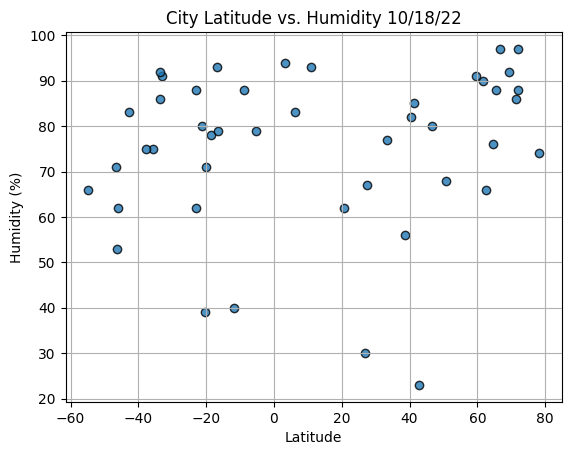

In [28]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

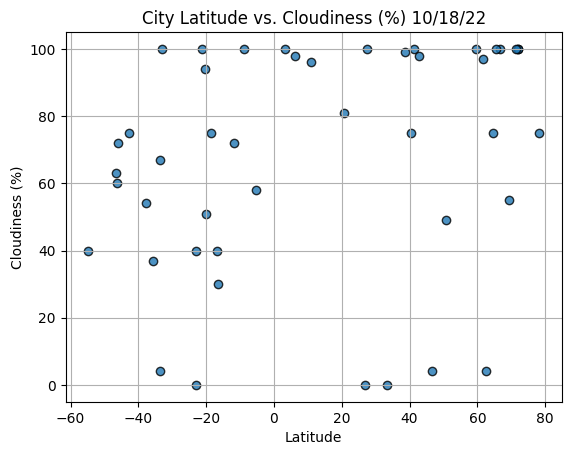

In [29]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

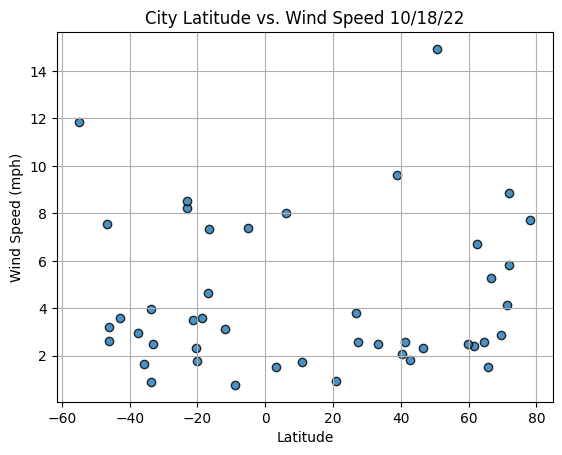

In [30]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
#plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [31]:
from scipy.stats import linregress 

C:\Users\Holme\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [32]:
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [33]:
#perform linear regresstiom
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps) 

line_eq = "y = "  + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq) 
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [34]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

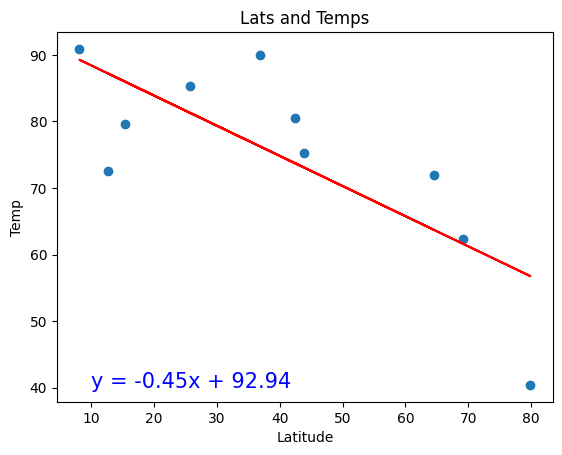

In [35]:
plt.scatter(lats, temps)
# plot line of regression
plt.plot(lats,regress_values,'r')
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.title('Lats and Temps')
plt.show()

In [36]:
# # This function will peform linear regression and plot data                       #primary function
# def plot_linear_regression(x_values,y_values,title,y_label,text_coodinates):
    
#     (slope,intecept,r_value,p_value,std_err,) = linregress(x_values,y_values)
    
#     # Calculate the regression line "y values" from the slope and intercept.
#     regress_values = (x_values * slope + intercept)
    
#     #get equation of that line.
#     line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
    
#     #plot the data.
#     plt.scatter(x_values,y_values)
#     plt.plot(x_values,regress_values,'r')
    
#     #Annotate and add labels
#     plt.annotate(line_eq,text_coordinates,fontsize=15,color='blue')
#     plt.title(title)
#     plt.xlabel('Latitude')
#     plt.ylabel(y_label)
#     plt.show()

In [37]:
# Create a function to create perform linear regression on the weather data   #backup in case of catastrophic failure
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [38]:
index13 = city_data_df.loc[13]
index13

City                       Faanui
Lat                      -16.4833
Lng                       -151.75
Max Temp                    298.4
Humidity                       79
Cloudiness                     30
Wind Speed                   7.36
Country                        PF
Date          2022-10-18 21:10:21
Name: 13, dtype: object

In [39]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]
northern_hemi_df.reset_index().head()

index         City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      0      Kodinar  20.7903   70.7031    299.31        62          81   
1      2  Yellowknife  62.4560 -114.3525    282.35        66           4   
2      3      Aksarka  66.5606   67.7975    277.00        97         100   
3      5       Vostok  46.4856  135.8833    269.71        80           4   
4      8       Susaki  33.3667  133.2833    286.18        77           0   

   Wind Speed Country                 Date  
0        0.93      IN  2022-10-18 21:10:07  
1        6.71      CA  2022-10-18 21:10:09  
2        5.26      RU  2022-10-18 21:10:10  
3        2.33      RU  2022-10-18 21:10:12  
4        2.51      JP  2022-10-18 21:10:17

In [40]:
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df.reset_index().head()

index          City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0      1       Ushuaia -54.8000  -68.3000    280.96        66          40   
1      4   Grand Gaube -20.0064   57.6608    294.37        71          51   
2      6        Neiafu -18.6500 -173.9833    300.53        78          75   
3      7  Batemans Bay -35.7167  150.1833    288.20        75          37   
4     12         Mpika -11.8343   31.4529    291.64        40          72   

   Wind Speed Country                 Date  
0       11.83      AR  2022-10-18 21:10:08  
1        1.79      MU  2022-10-18 21:10:11  
2        3.60      TO  2022-10-18 21:10:13  
3        1.65      AU  2022-10-18 21:10:17  
4        3.11      ZM  2022-10-18 21:10:20

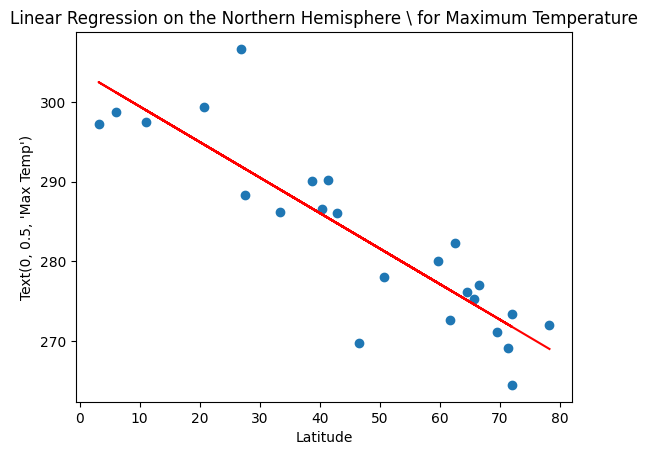

In [41]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
title = 'Linear Regression on the Northern Hemisphere \ for Maximum Temperature'
y_label = plt.ylabel('Max Temp')
text_coordinates = (10,40)
#Call the function {plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):}
plot_linear_regression(x_values, y_values, title , y_label, text_coordinates)

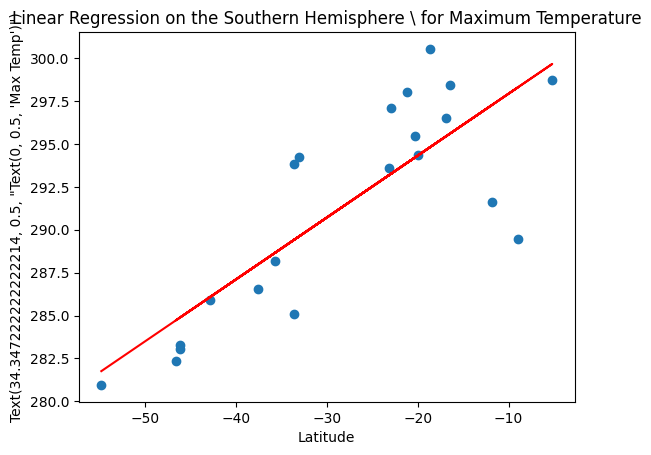

In [42]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
title = 'Linear Regression on the Southern Hemisphere \ for Maximum Temperature'
#y_label = plt.ylabel('')
text_coordinates = (-50,90)
#Call the function {plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):}
plot_linear_regression(x_values, y_values, title , y_label, text_coordinates)

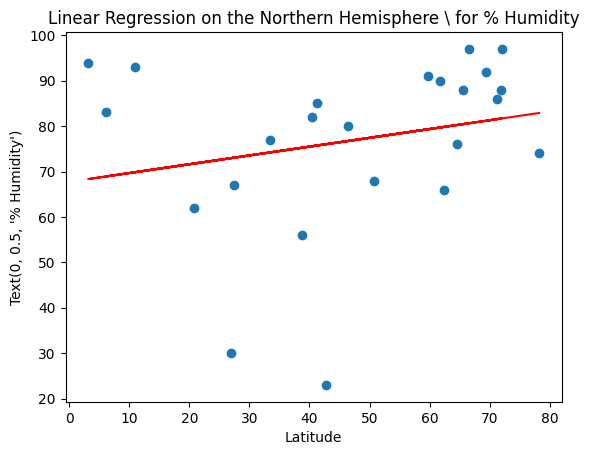

In [43]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
title = 'Linear Regression on the Northern Hemisphere \ for % Humidity'
y_label = plt.ylabel('% Humidity')
text_coordinates = (40,10)
#Call the function {plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):}
plot_linear_regression(x_values, y_values, title , y_label, text_coordinates)

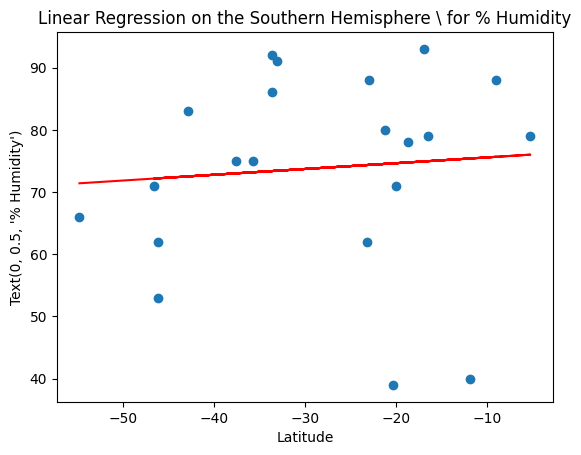

In [44]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
title = 'Linear Regression on the Southern Hemisphere \ for % Humidity'
y_label = plt.ylabel('% Humidity')
text_coordinates = (-50,15)
#Call the function {plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):}
plot_linear_regression(x_values, y_values, title , y_label, text_coordinates)